In [1]:
import h5py
import matplotlib.pyplot as plt
import mpl_lego as mplego
import neuropacks as packs
import numpy as np
import os

from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from mpl_lego.ellipse import plot_cov_ellipse
from noise_correlations import analysis, utils 

In [2]:
mplego.style.use_latex_style()
ccycle = mplego.colors.get_default_ccycle()

In [3]:
base_path = "/storage/fits/neurocorr/exp09"

In [5]:
pvc11_1_path = os.path.join(base_path, 'exp09_1_pvc11_15_1000_1000.h5')
pvc11_2_path = os.path.join(base_path, 'exp09_2_pvc11_15_1000_1000.h5')
pvc11_3_path = os.path.join(base_path, 'exp09_3_pvc11_15_1000_1000.h5')
ret2_path = os.path.join(base_path, 'exp09_ret2_15_1000_1000.h5')
ecog_path = os.path.join(base_path, 'exp09_ecog_15_3000_1000.h5')

In [7]:
pvc11_1 = h5py.File(pvc11_1_path, 'r')
#pvc11_2 = h5py.File(pvc11_2_path, 'r')
#pvc11_3 = h5py.File(pvc11_3_path, 'r')
#ret2 = h5py.File(ret2_path, 'r')
#ecog = h5py.File(ecog_path, 'r')
#results = [pvc11_1, pvc11_2, pvc11_3, ret2, ecog]
n_max_units = pvc11_1['units'].shape[2]
dims = 3 + np.arange(n_max_units - 2)

In [70]:
def plot_marginals(mu, cov, lim, ax):
    marginal_pdf = lambda mu, var, xs: np.exp(-(xs - mu)**2 / (2. * var)) / np.sqrt(2. * np.pi * var)
    xs = np.linspace(lim[0], lim[1], 1000)
    idxs = xs < 0
    ys = marginal_pdf(mu[0], cov[0, 0], xs)
    ax.plot(xs, -ys * lim[0] / ys.max() + lim[0], c='k')
    ax.fill_between(xs[idxs], lim[0]*np.ones_like(xs[idxs]),
                    -ys[idxs] * lim[0] / ys.max() + lim[0], fc='gray', alpha=1)
    ys = marginal_pdf(mu[1], cov[1, 1], xs)
    ax.plot(-ys * lim[0] / ys.max() + lim[0], xs,c='k')
    ax.fill_betweenx(xs[idxs], lim[0]*np.ones_like(xs[idxs]),
                    -ys[idxs] * lim[0] / ys.max() + lim[0], fc='gray', alpha=1)

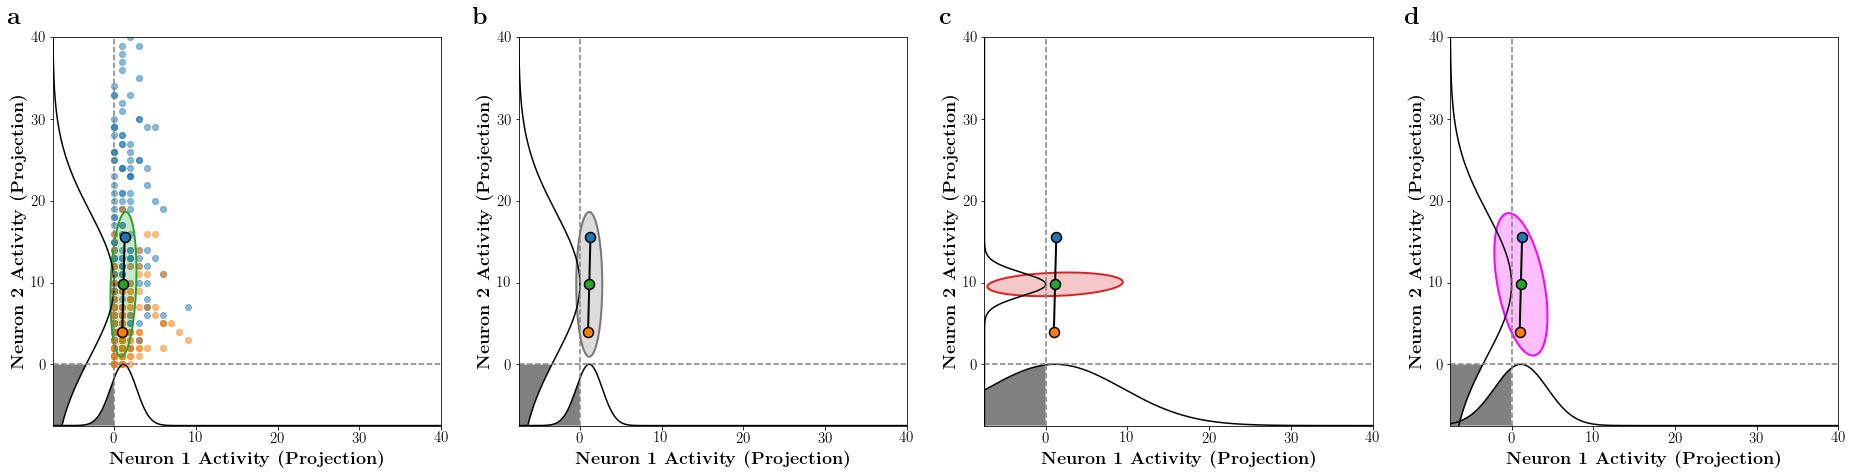

In [75]:
fig, axes = plt.subplots(1, 4, figsize=(32, 8))
idx = 3695

opt = pvc11_1['opt_covs/3'][idx]
opt_fa = pvc11_1['opt_fa_covs/3'][idx]
X1, X2 = utils.get_dimstim_responses_from_h5(pvc11_1, 0, idx)
cov1 = np.cov(X1.T)
cov2 = np.cov(X2.T)
obs = 0.5 * (cov1 + cov2)
mu1 = np.mean(X1, axis=0)
mu2 = np.mean(X2, axis=0)
avg_mean = 0.5 * (mu1 + mu2)

neuron1 = 0
neuron2 = 1
slc = [neuron1, neuron2]
lim = [-7.5, 40]

ax = axes[0]
# Plot the neural responses, stimulus 1
ax.scatter(
    X1[:, neuron1], X1[:, neuron2],
    marker='o',
    color='C0',
    alpha=0.5)
# # Plot the noise covariance ellipse, stimulus 1
# plot_cov_ellipse(
#     cov1[slc][:, slc],
#     mu1[slc],
#     ax,
#     include_mu=False,
#     n_std=1,
#     linewidth=2,
#     facecolor=mplego.colors.hex_to_rgb(ccycle[0], 0.25),
#     edgecolor=mplego.colors.hex_to_rgb(ccycle[0], 1.0)),

# Plot the neural responses, stimulus 2
ax.scatter(
    X2[:, neuron1], X2[:, neuron2],
    marker='o',
    color='C1',
    alpha=0.5)
# # Plot the noise covariance ellipse, stimulus 2
# plot_cov_ellipse(
#     cov2[slc][:, slc],
#     mu2[slc],
#     ax,
#     include_mu=False,
#     n_std=1,
#     linewidth=2,
#     facecolor=mplego.colors.hex_to_rgb(ccycle[1], 0.25),
#     edgecolor=mplego.colors.hex_to_rgb(ccycle[1], 1.0))

# Plot observed covariance ellipse
plot_cov_ellipse(
    obs,
    avg_mean[[neuron1, neuron2]],
    ax,
    include_mu=False,
    n_std=1,
    linewidth=2,
    facecolor=mplego.colors.hex_to_rgb(ccycle[2], 0.25),
    edgecolor=mplego.colors.hex_to_rgb(ccycle[2], 1.0))
plot_marginals(avg_mean[[neuron1, neuron2]],
               obs,
               lim, ax)

ax = axes[1]
# Plot shuffle covariance ellipse
plot_cov_ellipse(
    np.diag(np.diag(obs)),
    avg_mean[[neuron1, neuron2]],
    ax,
    include_mu=False,
    n_std=1,
    linewidth=2,
    facecolor=mplego.colors.hex_to_rgb('#777777', 0.25),
    edgecolor=mplego.colors.hex_to_rgb('#777777', 1.0))
plot_marginals(avg_mean[[neuron1, neuron2]],
               np.diag(np.diag(obs)),
               lim, ax)

ax = axes[2]
# Plot optimal covariance ellipse
plot_cov_ellipse(
    opt[[neuron1, neuron2]][:, [neuron1, neuron2]],
    avg_mean[[neuron1, neuron2]],
    ax,
    include_mu=False,
    n_std=1,
    linewidth=2,
    facecolor=mplego.colors.hex_to_rgb(ccycle[3], 0.25),
    edgecolor=mplego.colors.hex_to_rgb(ccycle[3], 1.0))
plot_marginals(avg_mean[[neuron1, neuron2]],
               opt[[neuron1, neuron2]][:, [neuron1, neuron2]],
               lim, ax)

ax = axes[3]
# Plot optimal FA covariance ellipse
plot_cov_ellipse(
    opt_fa[[neuron1, neuron2]][:, [neuron1, neuron2]],
    avg_mean[[neuron1, neuron2]],
    ax,
    include_mu=False,
    n_std=1,
    linewidth=2,
    facecolor=mplego.colors.hex_to_rgb('#FF00FF', 0.25),
    edgecolor=mplego.colors.hex_to_rgb('#FF00FF', 1.0))
plot_marginals(avg_mean[[neuron1, neuron2]],
               opt_fa[[neuron1, neuron2]][:, [neuron1, neuron2]],
               lim, ax)

labels = ['a', 'b', 'c', 'd']
for ii, ax in enumerate(axes):
    # Plot the differential correlation direction
    ax.plot(
        [mu1[0], mu2[0]], [mu1[neuron2], mu2[neuron2]],
        linewidth=2,
        color='black')
    # Plot the mean, stimulus 1
    ax.scatter(
        mu1[neuron1], mu1[neuron2],
        color='C0',
        edgecolor='black',
        linewidth=1.5,
        s=100,
        zorder=1000)
    # Plot the mean, stimulus 2
    ax.scatter(
        mu2[neuron1], mu2[neuron2],
        color='C1',
        edgecolor='black',
        linewidth=1.5,
        s=100,
        zorder=1000)
    # Plot the average mean
    ax.scatter(
        avg_mean[neuron1], avg_mean[neuron2],
        color='C2',
        edgecolor='black',
        linewidth=1.5,
        s=100,
        zorder=1000)
    # Indicate the axes
    ax.axvline(0, linestyle='--', color='gray')
    ax.axhline(0, linestyle='--', color='gray')

    mplego.scatter.tighten_scatter_plot(ax, lim=lim, identity=False)

    ax.set_xlabel(r'\textbf{Neuron 1 Activity (Projection)}', fontsize=18)
    ax.set_ylabel(r'\textbf{Neuron 2 Activity (Projection)}', fontsize=18)
    ax.tick_params(labelsize=15)
mplego.labels.apply_subplot_labels(axes, x=-0.1, size=25, bold=True)
plt.savefig('figure5a.png', bbox_inches='tight')
plt.savefig('figure5a.pdf', bbox_inches='tight')